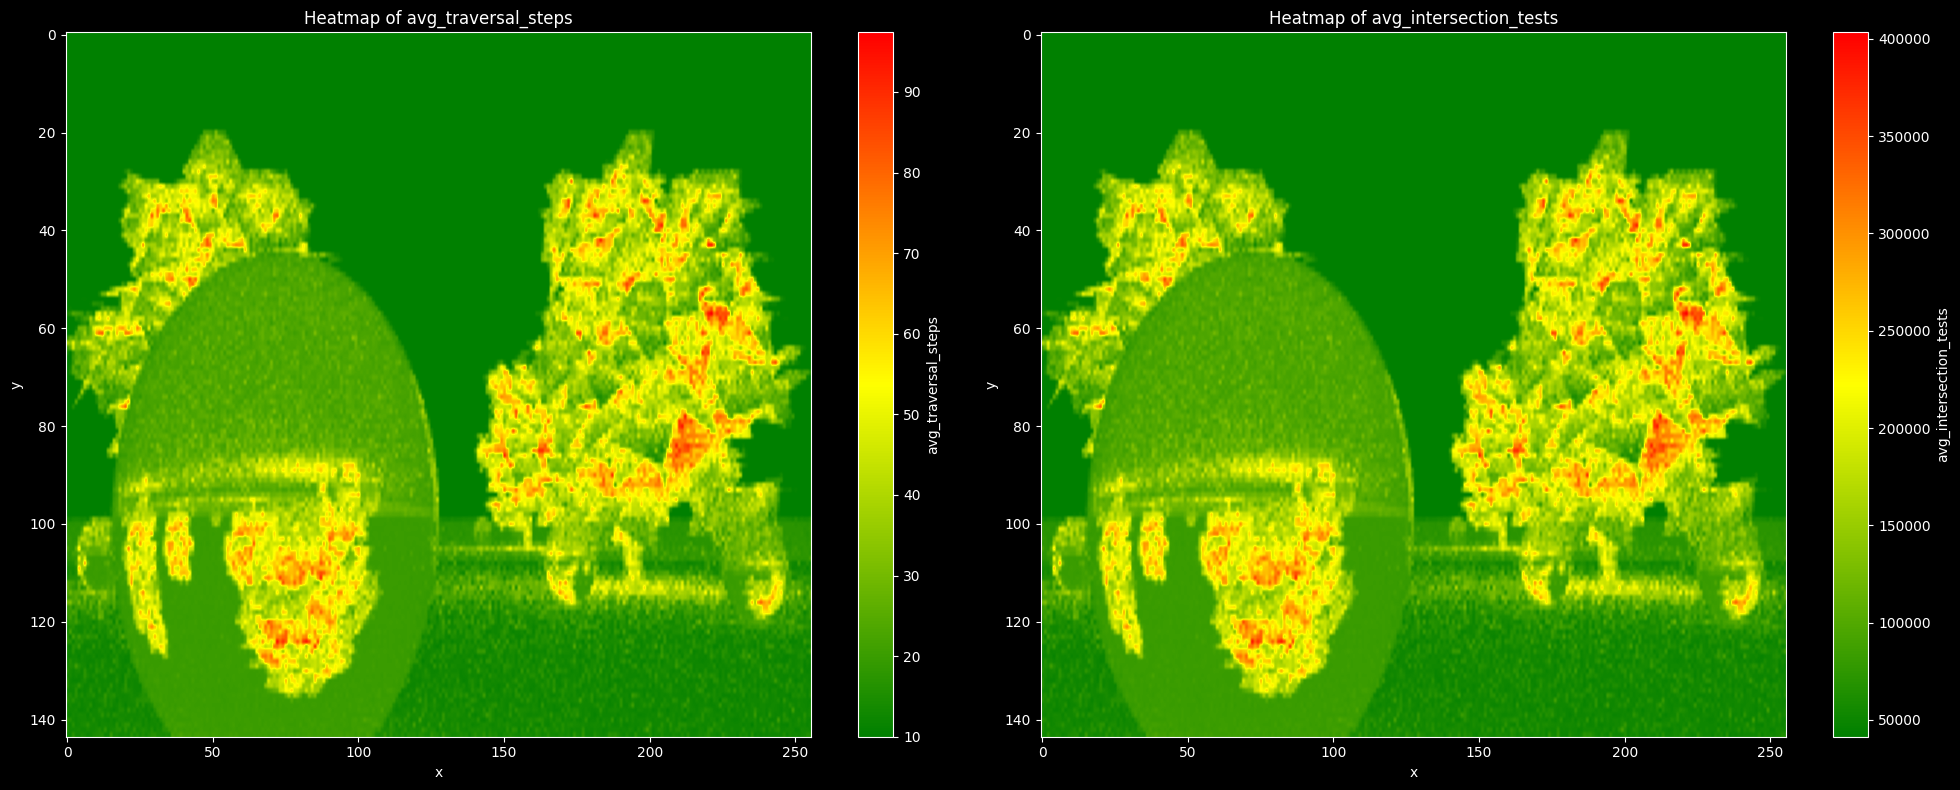

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

#  Read CSV 
file_path = 'metrics_1733787345.csv'
data = pd.read_csv(file_path, usecols=['x', 'y', 'avg_traversal_steps', 'avg_intersection_tests'], 
                   dtype={'x': 'int32', 'y': 'int32', 'avg_traversal_steps': 'float32', 'avg_intersection_tests': 'float32'})

#  Group data
grouped_data = data.groupby(['y', 'x'], as_index=False).mean()

# Create  heatmap 
max_y = grouped_data['y'].max() + 1  #  indices start from 0
max_x = grouped_data['x'].max() + 1

# Initialize  grids 
heatmap_data_1 = pd.DataFrame(0, index=range(max_y), columns=range(max_x), dtype='float32')
heatmap_data_2 = pd.DataFrame(0, index=range(max_y), columns=range(max_x), dtype='float32')

# Fill the heatmaps
for _, row in grouped_data.iterrows():
    heatmap_data_1.at[row['y'], row['x']] = row['avg_traversal_steps']
    heatmap_data_2.at[row['y'], row['x']] = row['avg_intersection_tests']

# Convert the data to NumPy arrays for plotting faster # other wise takes 10 minutes ! 
heatmap_data_1 = heatmap_data_1.values
heatmap_data_2 = heatmap_data_2.values

# Create a custom colormap (green -> yellow -> red)
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['green', 'yellow', 'red'])

#  normalization 
norm1 = Normalize(vmin=heatmap_data_1.min(), vmax=heatmap_data_1.max())
norm2 = Normalize(vmin=heatmap_data_2.min(), vmax=heatmap_data_2.max())

# Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap 1
im1 = axes[0].imshow(heatmap_data_1, cmap=custom_cmap, norm=norm1, aspect='auto')
axes[0].set_title('Heatmap of avg_traversal_steps')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

#  Heatmap 1
cbar1 = fig.colorbar(im1, ax=axes[0], orientation='vertical')
cbar1.set_label('avg_traversal_steps')

# Heatmap 2 
im2 = axes[1].imshow(heatmap_data_2, cmap=custom_cmap, norm=norm2, aspect='auto')
axes[1].set_title('Heatmap of avg_intersection_tests')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')

#  Heatmap 2
cbar2 = fig.colorbar(im2, ax=axes[1], orientation='vertical')
cbar2.set_label('avg_intersection_tests')

plt.tight_layout()
plt.show()
